#Import Libraries

In [19]:
!pip install nltk
!python -m textblob.download_corpora
!pip install plotly

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [20]:
import missingno
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import nltk.stem as stemmer
from datetime import datetime
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english") #use English stemmer

#import stopwords with nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_nltk = stopwords.words('english')

#import stopwords with scikit-learn
from sklearn.feature_extraction import text
stop_sklearn = text.ENGLISH_STOP_WORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Preview dataset & statistics and etc.

In [21]:
#get dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#store dataset into df variable
path = "/content/drive/MyDrive/FYP Code/Data/Clean Dataset (Symbols & Emojis).csv"
df = pd.read_csv(path)

In [23]:
#preview the top 15 rows in the dataframe
df.head(15)

Unnamed: 0            id        created_at       username  \
0            1  1.510000e+18  24/03/2022 17:38    looseuterus   
1            2  1.510000e+18  24/03/2022 17:36  HamlettClaire   
2            3  1.510000e+18  24/03/2022 17:29    AmericanGeo   
3            4  1.510000e+18  24/03/2022 17:27   neverdefunct   
4            5  1.510000e+18  24/03/2022 17:15  OurWaterfront   
5            6  1.510000e+18  24/03/2022 16:45    Sauce_ardis   
6            7  1.510000e+18  24/03/2022 16:28  saucedo_sidra   
7            8  1.510000e+18  24/03/2022 16:23      ricardoae   
8            9  1.510000e+18  24/03/2022 16:23  Ashley_wealth   
9           10  1.510000e+18  24/03/2022 16:21  Ashley_wealth   
10          11  1.510000e+18  24/03/2022 16:20  Ashley_wealth   
11          12  1.510000e+18  24/03/2022 16:20  Ashley_wealth   
12          13  1.510000e+18  24/03/2022 16:18  Ashley_wealth   
13          14  1.510000e+18  24/03/2022 16:10    MNTRYJOSEPH   
14          15  1.510000e+18  24/03/2022 15:55  DantheClamMan   

                      location  following  followers  retweet_count  \
0             mostly sea level        789       1257              0   
1                   Oxford, UK        658       1220              0   
2           New York, New York       3642      11452              1   
3              Zephyrhills, FL        636        192              0   
4           New York, New York       3265       5529              1   
5          Planet of the apes!         10          0              0   
6   The Universe IS # 1 whole!          1          0              0   
7                          NaN        306        206              0   
8              London, England        161         47              1   
9              London, England        161         47              0   
10             London, England        161         47              0   
11             London, England        161         47              0   
12             London, England        161         47              0   
13                     Florida        244        559              0   
14             Tucson, Arizona       3055       1893              0   

        search_term                                               text  
0   ocean pollution   ooh marvelous i suggest stefan helmreichs ali...  
1   ocean pollution   im writing a story that has to do with ocean ...  
2   ocean pollution  our latest is out now  ocean light pollution e...  
3   ocean pollution   probably not due to the pollution thats every...  
4   ocean pollution  underwater noise pollution could cause to expe...  
5   ocean pollution  i myself now in this beautiful moment could se...  
6   ocean pollution  i myself now in this beautiful moment could se...  
7   ocean pollution   the ocean cleanup plastic pollution coallitio...  
8   ocean pollution   ocean and sea awareness is reaching its peak ...  
9   ocean pollution   ocean and sea awareness is reaching its peak ...  
10  ocean pollution   ocean and sea awareness is reaching its peak ...  
11  ocean pollution   ocean and sea awareness is reaching its peak ...  
12  ocean pollution   ocean and sea awareness is reaching its peak ...  
13  ocean pollution  help us free the ocean of plastic pollution  f...  
14  ocean pollution  even the sea has light pollution these new map...

In [24]:
#drop column(s)
df.drop(['Unnamed: 0', 'id', 'username', 'following', 'followers', 'retweet_count'], inplace=True, axis=1)

In [25]:
#ensure the most important column has no null values, if there is, drop it
df = df[df['text'].notna()]

In [26]:
#show the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12627 entries, 0 to 12628
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   12627 non-null  object
 1   location     9112 non-null   object
 2   search_term  12627 non-null  object
 3   text         12627 non-null  object
dtypes: object(4)
memory usage: 493.2+ KB


In [27]:
#show the description of the dataframe
df.describe()

created_at location      search_term  \
count              12627     9112            12627   
unique              6067     2420               19   
top     29/03/2022 18:04   Global  ocean pollution   
freq                  22      207             3131   

                                            text  
count                                      12627  
unique                                      6243  
top     overfishing is a crisis for marine life   
freq                                         140

In [28]:
#preview 5 random rows in the dataframe
df.sample(5)

created_at                     location          search_term  \
4698   01/04/2022 12:55  Chennai and The Netherlands  sustainable fishing   
2619   01/04/2022 19:44                    Australia      ocean pollution   
9975   25/03/2022 16:37                    #WestCork  sustainable fishing   
229    22/03/2022 10:58                          NaN      ocean pollution   
11227  17/03/2022 11:47              London, England     marine pollution   

                                                    text  
4698   continued access for smallscale fisheries is v...  
2619   scientists can predict transfer of carbon  inc...  
9975   hope to hell that win this  on current form do...  
229    year are learning about plastic pollution toda...  
11227  catch ifaws marine conservation programme dire...

In [29]:
#show the shape of the dataframe
print(df.shape)

(12627, 4)


##Change column(s) type

In [30]:
#set some identifiers as string
#df['username'] = df['username'].astype('string')
df['location'] = df['location'].astype('string')
df['search_term'] = df['search_term'].astype('string')
df['text'] = df['text'].astype('string')

#set datetime data into different format, e.g.: 25/03/2022 20:17 to 2022-03-29 05:34:00
df['created_at'] = pd.to_datetime(df['created_at'], )

#errors='coerce' because Unknown string format: created_at
#df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
#df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
#df['date'] = pd.to_datetime(df['date'])

In [31]:
#check datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12627 entries, 0 to 12628
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   created_at   12627 non-null  datetime64[ns]
 1   location     9112 non-null   string        
 2   search_term  12627 non-null  string        
 3   text         12627 non-null  string        
dtypes: datetime64[ns](1), string(3)
memory usage: 493.2 KB


In [32]:
#check values from random row
df.iloc[20]

created_at                                   2022-03-24 15:06:00
location                                                    <NA>
search_term                                      ocean pollution
text           even the sea has light pollution these new map...
Name: 20, dtype: object

#Duplicate dataframe

In [33]:
df_duplicate = df

#Preview entries with null values (if any)

Preview of data with null values:
               created_at location          search_term  \
3387  2022-03-31 09:05:00     <NA>     marine pollution   
11236 2022-03-17 09:52:00     <NA>     marine pollution   
10980 2022-03-23 12:16:00     <NA>     marine pollution   
1416  2022-03-19 06:56:00     <NA>    marine ecosystems   
7549  2022-04-29 11:00:00     <NA>  sustainable fishing   

                                                    text  
3387    environmental valuation of inport shipping em...  
11236  war nuclear threat climate change marine pollu...  
10980  underwater noise pollution threat to marine life   
1416   our team currently being educated about marine...  
7549   eu and norway strengthen cooperation for susta...  


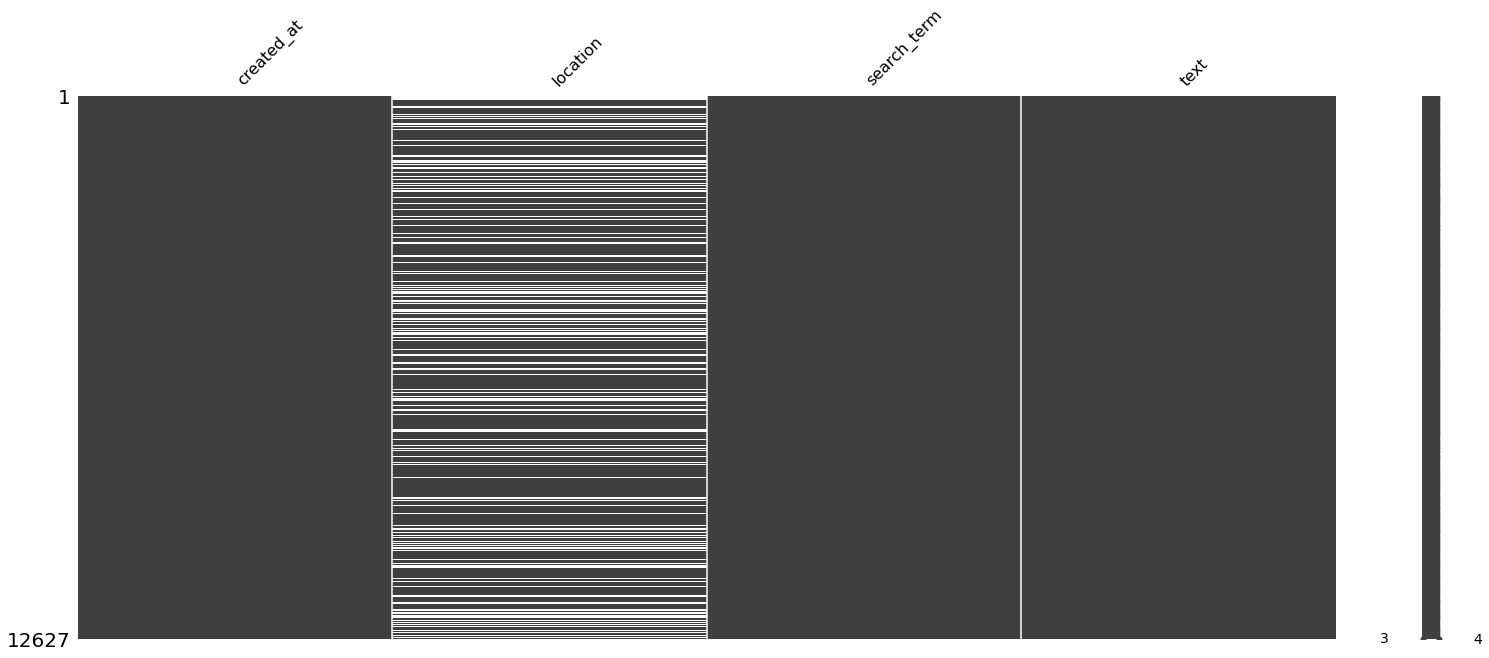

In [34]:
#check rows that contain null values in one of the column(s) and print random 5 rows that contain null values
if df_duplicate.isnull().any(axis=None):
    print("Preview of data with null values:")
    print(df_duplicate[df_duplicate.isnull().any(axis=1)].sample(5))
    missingno.matrix(df_duplicate)
    plt.show()

#Dealing with duplicate entries

In [35]:
#check number of duplicated rows in text column
df_duplicate.text.duplicated().sum()

6384

In [36]:
#preview the duplicated rows
df_duplicate.loc[df_duplicate.text.duplicated(keep='last'), :]

created_at            location          search_term  \
0     2022-03-24 17:38:00    mostly sea level      ocean pollution   
1     2022-03-24 17:36:00          Oxford, UK      ocean pollution   
2     2022-03-24 17:29:00  New York, New York      ocean pollution   
3     2022-03-24 17:27:00     Zephyrhills, FL      ocean pollution   
4     2022-03-24 17:15:00  New York, New York      ocean pollution   
...                   ...                 ...                  ...   
12529 2022-03-19 15:43:00              Global  sustainable fishing   
12572 2022-03-17 07:20:00                <NA>  sustainable fishing   
12581 2022-03-16 17:27:00                <NA>  sustainable fishing   
12583 2022-03-16 17:10:00                <NA>  sustainable fishing   
12619 2022-03-24 09:00:00              France  #sustainablefishing   

                                                    text  
0       ooh marvelous i suggest stefan helmreichs ali...  
1       im writing a story that has to do with ocean ...  
2      our latest is out now  ocean light pollution e...  
3       probably not due to the pollution thats every...  
4      underwater noise pollution could cause to expe...  
...                                                  ...  
12529  sparking change in mexico a global press story...  
12572  fisheries meps urge commission to give directi...  
12581  watch ’s fiona lewis is extremely passionate a...  
12583  new article what is the marine stewardship cou...  
12619  the is a which due to its versatility can be w...  

[6384 rows x 4 columns]

In [37]:
#drop all the similar rows except one and store the dataframe into new variable
df_new = df_duplicate.drop_duplicates(subset=['text'], keep='last')

In [38]:
#preview dataframe
df_new

created_at        location          search_term  \
889   2022-03-24 14:42:00       Sri Lanka     marine pollution   
4881  2022-04-29 16:18:00            <NA>      ocean pollution   
4882  2022-04-29 16:17:00   International      ocean pollution   
4884  2022-04-29 16:10:00    Planet Earth      ocean pollution   
4886  2022-04-29 15:47:00   Paris, France      ocean pollution   
...                   ...             ...                  ...   
12624 2022-03-20 13:10:00             USA  #sustainablefishing   
12625 2022-03-18 09:00:00          France  #sustainablefishing   
12626 2022-03-18 06:49:00          Global  #sustainablefishing   
12627 2022-03-17 22:00:00  Houston, Texas  #sustainablefishing   
12628 2022-03-17 09:01:00          France  #sustainablefishing   

                                                    text  
889    gihans beach resort in dehiwala marine drive i...  
4881   research discovers new bacteria that stick to ...  
4882    both are terrible outcomes thats why we shoul...  
4884   under the high emissions scenario that the sci...  
4886   abrupt climate change with 4°c19°c of global w...  
...                                                  ...  
12624  get wildly sustainable seafood when you try  t...  
12625  morgére assure you of a wellfinished product m...  
12626    oped top challenges facing sustainable seafood   
12627  our oyster supplier prestige oysters is the fi...  
12628  the is a which due to its versatility can be w...  

[6243 rows x 4 columns]

#Plot data & Text pre-processing

In [39]:
#allocate two new columns for date and time
df_new['date'] = [d.date() for d in df_new['created_at']]
#df_new['time'] = [d.time() for d in df_new['created_at']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
#preview dataframe
df_new

created_at        location          search_term  \
889   2022-03-24 14:42:00       Sri Lanka     marine pollution   
4881  2022-04-29 16:18:00            <NA>      ocean pollution   
4882  2022-04-29 16:17:00   International      ocean pollution   
4884  2022-04-29 16:10:00    Planet Earth      ocean pollution   
4886  2022-04-29 15:47:00   Paris, France      ocean pollution   
...                   ...             ...                  ...   
12624 2022-03-20 13:10:00             USA  #sustainablefishing   
12625 2022-03-18 09:00:00          France  #sustainablefishing   
12626 2022-03-18 06:49:00          Global  #sustainablefishing   
12627 2022-03-17 22:00:00  Houston, Texas  #sustainablefishing   
12628 2022-03-17 09:01:00          France  #sustainablefishing   

                                                    text        date  
889    gihans beach resort in dehiwala marine drive i...  2022-03-24  
4881   research discovers new bacteria that stick to ...  2022-04-29  
4882    both are terrible outcomes thats why we shoul...  2022-04-29  
4884   under the high emissions scenario that the sci...  2022-04-29  
4886   abrupt climate change with 4°c19°c of global w...  2022-04-29  
...                                                  ...         ...  
12624  get wildly sustainable seafood when you try  t...  2022-03-20  
12625  morgére assure you of a wellfinished product m...  2022-03-18  
12626    oped top challenges facing sustainable seafood   2022-03-18  
12627  our oyster supplier prestige oysters is the fi...  2022-03-17  
12628  the is a which due to its versatility can be w...  2022-03-17  

[6243 rows x 5 columns]

In [41]:
#standardize the date format
df_new['date'] = pd.to_datetime(df_new.date, format='%Y-%m-%d')
df_new['date'] = pd.to_datetime(df_new['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
#drop unnecessary columns
#df_new = df_new.drop(['created_at', 'time'], axis=1)
df_new = df_new.drop(['created_at'], axis=1)

In [43]:
#x, y  = np.unique(df_new['date'], return_counts=True)

In [44]:
#calculate number of each values
df_new['date'].value_counts()

2022-04-22    512
2022-03-22    320
2022-03-23    313
2022-03-25    297
2022-04-28    289
2022-03-31    287
2022-04-26    276
2022-03-17    269
2022-03-18    266
2022-04-25    258
2022-01-04    254
2022-04-27    250
2022-03-30    249
2022-04-29    234
2022-04-23    232
2022-03-29    232
2022-03-21    213
2022-03-28    202
2022-03-24    196
2022-04-24    184
2022-03-20    181
2022-03-26    153
2022-03-19    151
2022-03-16    140
2022-03-27    136
2022-04-21     93
2022-02-04     56
Name: date, dtype: int64

In [45]:
#calculate number of each values
df_new['location'].value_counts()

Global                            90
Washington, DC                    63
United States                     45
London                            42
Canada                            42
                                  ..
All Boundaries are conventions     1
Washington, District Of Columb     1
here, there                        1
 Where Carl Sagan Warned Us        1
Houston, Texas                     1
Name: location, Length: 2317, dtype: Int64

In [46]:
#calculate number of each values
df_new['search_term'].value_counts()

ocean pollution               1398
overfishing                    839
marine ecosystems              700
marine pollution               682
ocean acidification            621
sustainable fishing            435
ocean dumping                  407
marine litter                  293
ocean threats                  173
#marinelitter                  117
aquatic environments           112
#oceanpollution                102
#overfishing                    93
#oceanacidification             87
sea water level rising          72
#marinepollution                44
#sustainablefishing             40
#marineecosystems               20
marine environment threats       8
Name: search_term, dtype: Int64

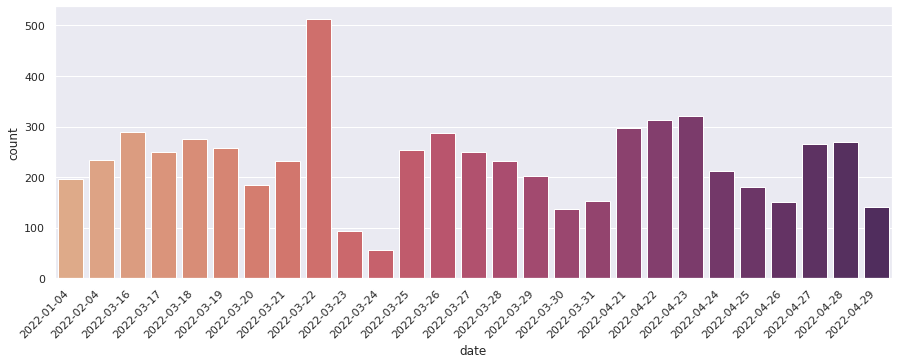

In [47]:
#plot dates data
sns.set_style('white')
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(x='date', data=df_new, palette='flare')
plot_dates = df_new['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax = ax.set_xticklabels(labels=plot_dates, rotation=45, ha='right')

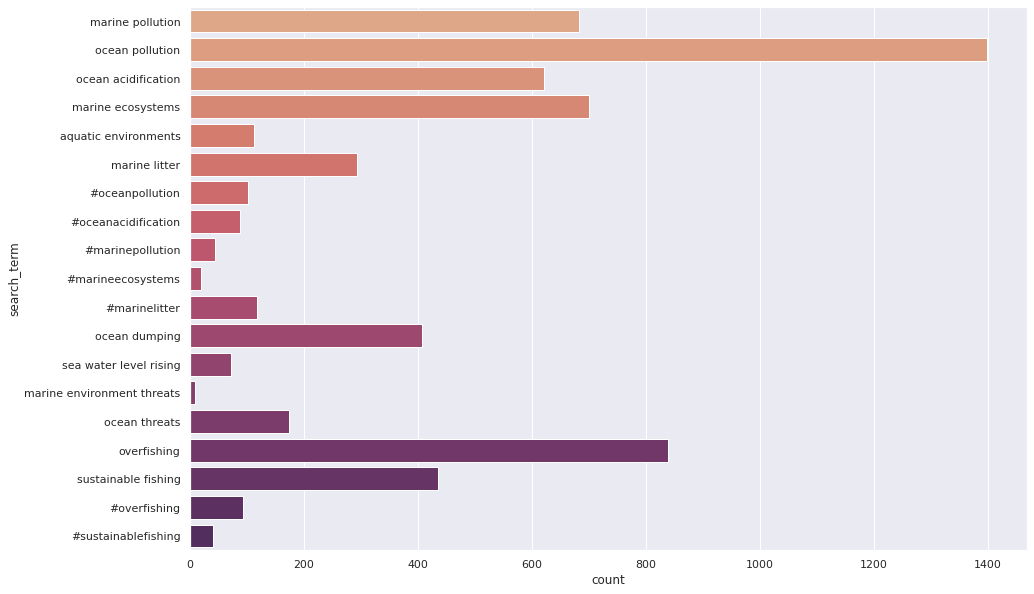

In [48]:
#plot search term data
sns.set(rc={'figure.figsize':(15,10)})
term_freq = sns.countplot(y='search_term', data=df_new, palette='flare')

In [49]:
#create new columns which contain polarity, subjectivity, length of text and word count
df_new['text_len'] = df_new['text'].astype(str).apply(len)
df_new['word_count'] = df_new['text'].apply(lambda x: len(str(x).split()))
df_new['polarity'] = df_new['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df_new['subjectivity'] = df_new['text'].map(lambda text: TextBlob(text).sentiment.subjectivity)

In [50]:
#create a function to get the sentiment score
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

#create a column to store the text sentiment
df_new['sentiment'] = df_new['polarity'].apply(getSentiment)

In [51]:
#create graph to visualize Subjectivity VS Polarity
fig = px.scatter(df_new, x='polarity', y='subjectivity', color='sentiment',
                 title="Subjectivity VS Polarity",
                 color_discrete_sequence=["red", "green", "blue"])
fig.show()

In [52]:
#check list of tweets with polarity = -1 and subjectivity = 1
df_new[(df_new.subjectivity == 1) & (df_new.polarity == -1)]

location           search_term  \
5150                             Ohio       ocean pollution   
5801             Mandaluyong City, PH   ocean acidification   
5804                             <NA>   ocean acidification   
5929        ÜT: -33.414009,-70.559634   ocean acidification   
6261                             <NA>      marine pollution   
9022          Saskatoon, Saskatchewan  aquatic environments   
10142                     Los Angeles       ocean pollution   
10216                 Athens - Greece       ocean pollution   
10242                 Ontario, Canada       ocean pollution   
10247                 Athens - Greece       ocean pollution   
10248                  Washington, DC       ocean pollution   
10253                         Chennai       ocean pollution   
10792  #DoGood with every transaction   ocean acidification   
10817                   Paris, France   ocean acidification   
10963                  Lagos, Nigeria      marine pollution   
12081          Cleveland Heights Ohio           overfishing   
12216                            Hoen           overfishing   
12391                            <NA>           overfishing   

                                                    text       date  text_len  \
5150    this is a gigantic undertaking the ocean and ... 2022-04-26       193   
5801    what is ocean acidification and how do we ale... 2022-04-27       251   
5804    🤢🤢🤢🤢🤢🤢🤢🤢 that is how i fee about deves and ln... 2022-04-26       225   
5929    its worst than that we have planetary boundar... 2022-04-23       263   
6261   video dw bilge dumping the worst pollution fro... 2022-04-22        54   
9022   mar is world day for the end of fishing banner... 2022-03-25       171   
10142  seafarers circumvent environmental laws to sav... 2022-03-23       154   
10216  how chronic oil pollution at sea goes unpunish... 2022-03-22       249   
10242  exclusive how sea goes unpunished cargo ships ... 2022-03-22       210   
10247  how chronic oil pollution at sea goes unpunish... 2022-03-22       251   
10248  cargo ships continue to pollute the worlds oce... 2022-03-22       201   
10253  spotlight  a investigation looks into how seaf... 2022-03-22       143   
10792   beach  what is ocean acidificationocean acidi... 2022-03-20       152   
10817  6 contdstatecorporate media wont focus on the ... 2022-03-19       215   
10963  shocking ocean plastic factsmore than million ... 2022-03-23       232   
12081   i think it has to do with conservation and ov... 2022-03-24       116   
12216   noooooooo overfishing is literally the worst ... 2022-03-21        71   
12391  with all this talk of climate change and savin... 2022-03-17       233   

       word_count  polarity  subjectivity sentiment  
5150           38      -1.0           1.0  Negative  
5801           38      -1.0           1.0  Negative  
5804           38      -1.0           1.0  Negative  
5929           30      -1.0           1.0  Negative  
6261            9      -1.0           1.0  Negative  
9022           29      -1.0           1.0  Negative  
10142          23      -1.0           1.0  Negative  
10216          38      -1.0           1.0  Negative  
10242          31      -1.0           1.0  Negative  
10247          39      -1.0           1.0  Negative  
10248          31      -1.0           1.0  Negative  
10253          21      -1.0           1.0  Negative  
10792          22      -1.0           1.0  Negative  
10817          27      -1.0           1.0  Negative  
10963          37      -1.0           1.0  Negative  
12081          20      -1.0           1.0  Negative  
12216          11      -1.0           1.0  Negative  
12391          40      -1.0           1.0  Negative

In [53]:
#check tweet in specific location 
#polarity: 1 very positive to -1 very negative
#subjectivity: 1 very personal opinion, emotion or judgment statement to -1 very factual statement
df_new[(df_new.subjectivity == 1) & (df_new.polarity == -1)].iloc[5,2]

'mar is world day for the end of fishing banner drop at  help us raise awareness about pain endured by aquatic life amp humanitys devastating impact on marine environments '

In [54]:
#replace all the word amp to and in the dataset
df_new['text'] = df_new['text'].replace('amp', 'and', regex=True)

In [55]:
#box plot for polarity vs sentiment
fig = px.box(df_new, x="sentiment", y="polarity", color_discrete_sequence=['mediumvioletred'],
             title="Polarity VS Sentiment")
fig.show()

In [56]:
count = 1
print('5 random reviews with the highest positive sentiment polarity: \n')
twe = df_new.loc[df_new.polarity == 1, ['text']].sample(5).values
for t in twe:
  tw = t[0]
  print(f"{count}. {tw}")
  #print(t[0])
  count += 1

5 random reviews with the highest positive sentiment polarity: 

1. check out this awesome feature with from on ocean plastic pollution 
2. climate change is the biggest threat to the planet but the greatest threat to the worlds oceans is overfishing 
3. where does your ends up folkslets aim for a and make the best use of finite and for and 
4. james blunt is best known as a recording artist but hes also a proponent of sustainable fishing 
5. i believe ocean acidification is best described by this one quote from oprah you can have it all you just cant have it all at once


In [57]:
count = 1
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
twe = df_new.loc[df_new.polarity == 0, ['text']].sample(5).values
for t in twe:
  tw = t[0]
  print(f"{count}. {tw}")
  #print(t[0])
  count += 1

5 random reviews with the most neutral sentiment(zero) polarity: 

1. me and my camerabeautiful dawn at around 00am in the morningfor the surf contestbiggest surf on the west coast 
2. passive sandling of environmental dna in aquatic environments using dprinted hydroxyapatite sandlers 
3. in  friends of gumbo limbo has transitioned into gumbo limbo coastal stewards our mission is to continue to sponsor conservation and advocate for enhancing the  we invite you to follow us as we inspire of marine and coastal ecosystems 
4. submit your abstract to t of the imdc in busan  “panarctic governance of marine plastic litter  and beyond”  
5. human  are we too noisy for the sea life 


In [58]:
count = 1
print('5 reviews with the most negative polarity: \n')
twe = df_new.loc[df_new.polarity < -0.97500000000000009, ['text']].sample(5).values
for t in twe:
  tw = t[0]
  print(f"{count}. {tw}")
  #print(t[0])
  count += 1

5 reviews with the most negative polarity: 

1. cargo ships continue to pollute the worlds oceans with oily wastewater a dw investigation shows how seafarers circumvent environmental laws to save time and money with devastating effects on the ocean 
2. how chronic oil pollution at sea goes unpunished  cargo ships continue to pollute the worlds oceans with oily wastewater an investigation shows how seafarers circumvent environmental laws to save time and money with devastating effects on the ocean 
3.  what is ocean acidification and how do we alert people to this looming crisis adbs stephen peters and dan millison writes about the urgency to accelerate policy and investment options to address potentially devastating impacts of ocean acidification 
4.  this is a gigantic undertaking the ocean and the water ways that feed it are the life blood of our world we need to continue to undue the terrible pollution and harm we have done to our world 
5.  beach  what is ocean acidificationocean a

In [59]:
#histogram for sentiment
fig = px.histogram(df_new, x="sentiment", nbins=50, 
                   color="sentiment", color_discrete_sequence=["red", "green", "blue"],
                   title="Sentiment Frequency")
fig.show()

In [60]:
#boxplot for polarity vs sentiment
fig = px.box(df_new, x="sentiment", y="polarity",
             color="sentiment", color_discrete_sequence=["red", "green", "blue"],
             title="polarity vs sentiment")

fig.show()

In [61]:
#boxplot for subjectivity vs sentiment
fig = px.box(df_new, x="sentiment", y="subjectivity",
             color="sentiment", color_discrete_sequence=["red", "green", "blue"],
             title="subjectivity vs sentiment")

fig.show()

In [62]:
#boxplot for length of text vs sentiment
fig = px.box(df_new, x="sentiment", y="text_len",
             color="sentiment", color_discrete_sequence=["red", "green", "blue"],
             title="length of text vs sentiment")

fig.show()

In [63]:
#boxplot for word count sentiment
fig = px.box(df_new, x="sentiment", y="word_count",
             color="sentiment", color_discrete_sequence=["red", "green", "blue"],
             title="subjectivity vs sentiment")

fig.show()

In [64]:
#histogram for polarity
fig = px.histogram(df_new, x="polarity", nbins=50, color_discrete_sequence=['mediumvioletred'])
fig.show()

In [65]:
#histogram for subjectivity
fig = px.histogram(df_new, x="subjectivity", nbins=50, color_discrete_sequence=['mediumvioletred'])
fig.show()

In [66]:
#histogram for length of tweets
fig = px.histogram(df_new, x="text_len", nbins=50, color_discrete_sequence=['mediumvioletred'])
fig.show()

In [67]:
#histogram for woord count in tweets
fig = px.histogram(df_new, x="word_count", nbins=50, color_discrete_sequence=['mediumvioletred'])
fig.show()

In [68]:
#exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
#df_new['sklearn_remstopwords_text'] = df_new['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_sklearn)]))
df_new['remstopwords_text'] = df_new['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_nltk)]))

In [69]:
#original text in 4th row
df_new.iloc[3,2]

'under the high emissions scenario that the scientists modeled in which pollution from the burning of fossil fuels continues to climb warming would trigger ocean species loss by that was on par with the five mass extinctions in earth’s past '

In [70]:
#text after removing stopwords using nltk stopwords library in 4th row
df_new.iloc[3,9]

'high emissions scenario scientists modeled pollution burning fossil fuels continues climb warming would trigger ocean species loss par five mass extinctions earth’s past'

In [71]:
#tokenize text
df_new['tokenized'] = df_new.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [72]:
#lemmatize text
wordnet_lem = WordNetLemmatizer()

df_new['lemmatize_text'] = df_new['remstopwords_text'].apply(wordnet_lem.lemmatize)

In [73]:
#stemming from nltk removed stopwords-text

#split the sentences to lists of words.
df_new['unstemmed'] = df_new['remstopwords_text'].str.split()
#stem every word
df_new['stemmed_text'] = df_new['unstemmed'].apply(lambda x: [stemmer.stem(y) for y in x])
#drop unstemmed column 
df_new = df_new.drop(columns=['unstemmed'])

[Text(0.5, 1.0, 'Top 20 words in tweets before removing stop words')]

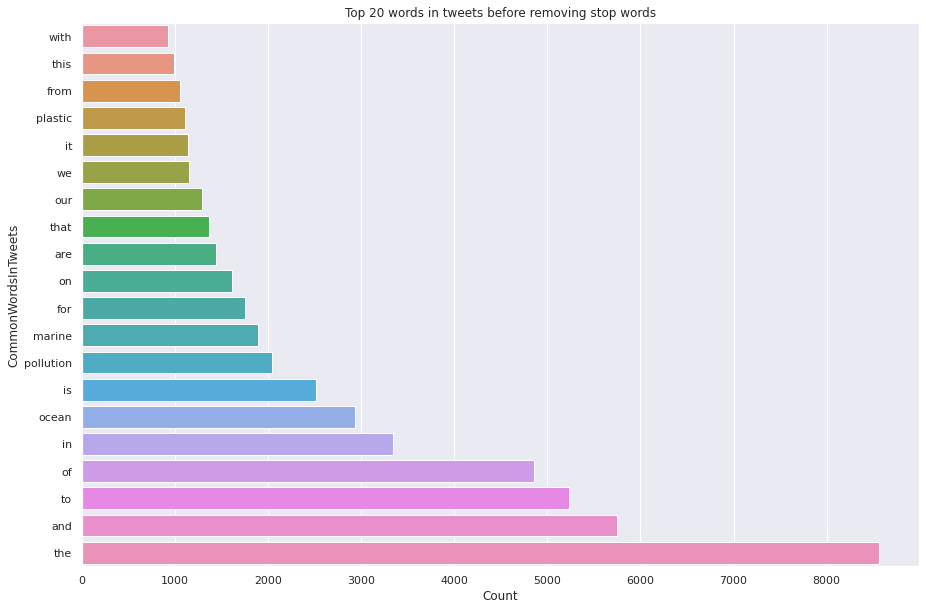

In [74]:
#Horizontal bar graph for top 20 words in tweets before removing stopwords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df_new['text'], 20)

df_comwords = pd.DataFrame(common_words, columns = ['CommonWordsInTweets' , 'Count'])

sns.barplot(x = 'Count',
            y = 'CommonWordsInTweets',
            data = df_comwords,
            order=df_comwords.sort_values('Count',ascending = True).CommonWordsInTweets).set(title='Top 20 words in tweets before removing stop words')

[Text(0.5, 1.0, 'Top 20 words in tweets after removing stop words')]

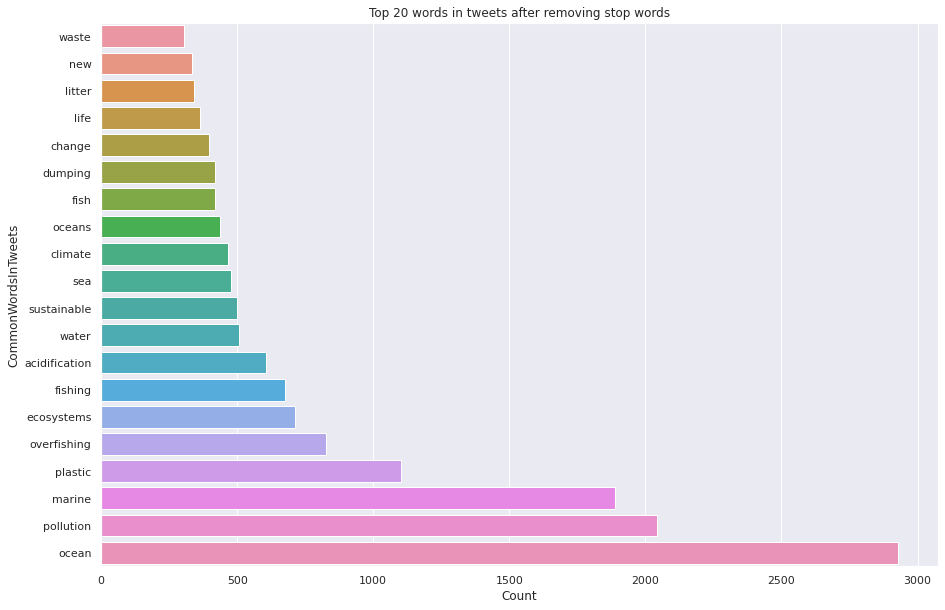

In [75]:
#Horizontal bar graph for top 20 words in tweets after removing stopwords
def get_top_n_words_outstopwords(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words_outstopwords(df_new['text'], 20)

df_comwords = pd.DataFrame(common_words, columns = ['CommonWordsInTweets' , 'Count'])

sns.barplot(x = 'Count',
            y = 'CommonWordsInTweets',
            data = df_comwords,
            order=df_comwords.sort_values('Count',ascending = True).CommonWordsInTweets).set(title='Top 20 words in tweets after removing stop words')


In [76]:
#Horizontal bar graph for top 20 bigrams in tweets before removing stopwords
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df_new['text'], 20)

df_comwords = pd.DataFrame(common_words, columns = ['CommonBigramInTweets' , 'Count'])

fig = px.bar(df_comwords,
             x = 'Count',
             y = 'CommonBigramInTweets',
             title = 'Top 20 Bigrams In Tweets Before Removing Stop Words')

fig.update_traces(marker_color='#C1DEAE')

fig.show()

In [77]:
#Horizontal bar graph for top 20 bigrams in tweets after removing stopwords
def get_top_n_bigram_outstopwords(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram_outstopwords(df_new['text'], 20)

df_comwords = pd.DataFrame(common_words, columns = ['CommonBigramInTweets' , 'Count'])

fig = px.bar(df_comwords,
             x = 'Count',
             y = 'CommonBigramInTweets',
             title = 'Top 20 Bigrams In Tweets After Removing Stop Words')

fig.update_traces(marker_color='#C1DEAE')

fig.show()

In [78]:
#Horizontal bar graph for top 20 trigrams in tweets before removing stopwords
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(df_new['text'], 20)

df_comwords = pd.DataFrame(common_words, columns = ['CommonTrigramInTweets' , 'Count'])

fig = px.bar(df_comwords,
             x = 'Count',
             y = 'CommonTrigramInTweets',
             title = 'Top 20 Trigrams In Tweets Before Removing Stop Words')

fig.update_traces(marker_color='#C1DEAE')

fig.show()

In [79]:
#Horizontal bar graph for top 20 trigrams in tweets after removing stopwords
def get_top_n_trigram_outstopwords(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram_outstopwords(df_new['text'], 20)

df_comwords = pd.DataFrame(common_words, columns = ['CommonTrigramInTweets' , 'Count'])

fig = px.bar(df_comwords,
             x = 'Count',
             y = 'CommonTrigramInTweets',
             title = 'Top 20 Trigrams In Tweets After Removing Stop Words')

fig.update_traces(marker_color='#C1DEAE')

fig.show()

In [80]:
#frequency of part-of-speech-tagging in tweets
blob = TextBlob(str(df_new['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df['pos'].value_counts()[:20]
pos_df = pd.DataFrame(pos_df)
pos_df = pos_df.reset_index()
#change column names
pos_df.columns = ['pos', 'count'] 

fig = px.bar(pos_df,
             x = 'pos',
             y = 'count',
             title = 'Top 20 Part-of-Speech Tagging In Tweets')

fig.update_traces(marker_color='#C1DEAE')

fig.show()

##Wordcloud

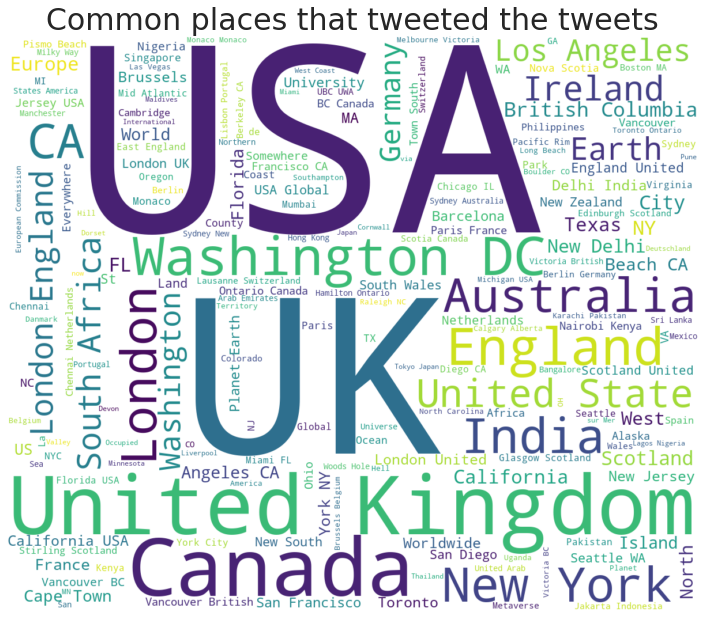

In [81]:
#wordcloud for most users' countries
loc_df = df_new[['location']].copy()

#checking for NaN values
loc_df.isna().sum()
#removing NaN Values
loc_df.dropna(inplace = True)

#get name of index for which the value is insignificant
index_name = loc_df[loc_df['location'] == 'Global'].index
  
# drop insignificant values from dataFrame
loc_df.drop(index_name, inplace = True)

#function for wordcloud
def wordcloud_generator (data, title = None):
  wordcloud = WordCloud(width = 1200, height = 1000,
                        background_color = 'white',
                        min_font_size = 10
                        ).generate(" ".join(data.values))

  #plot the WordCloud image
  plt.figure(figsize = (10,8), facecolor = None)
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title(title, fontsize = 30)
  plt.show()

wordcloud_generator(loc_df['location'], title = "Common places that tweeted the tweets")

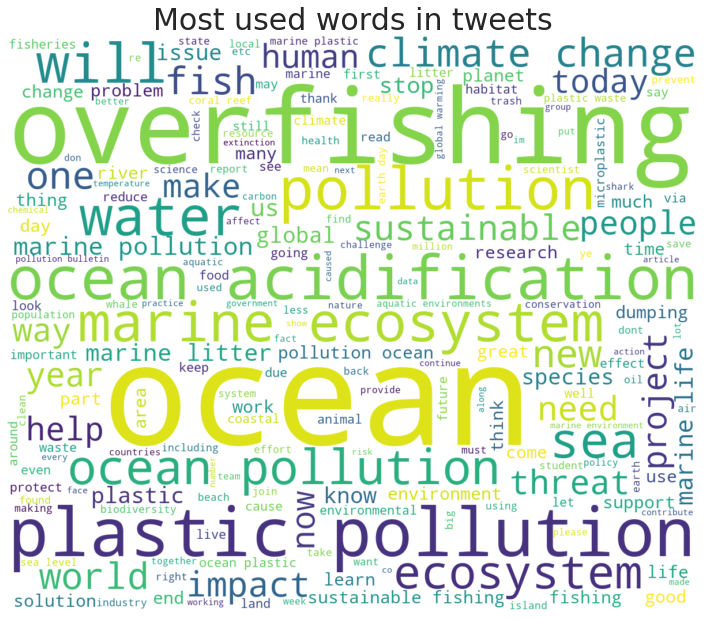

In [82]:
#wordcloud for tweets before removinng stopwords
wordcloud_generator(df_new['text'], title = "Most used words in tweets")

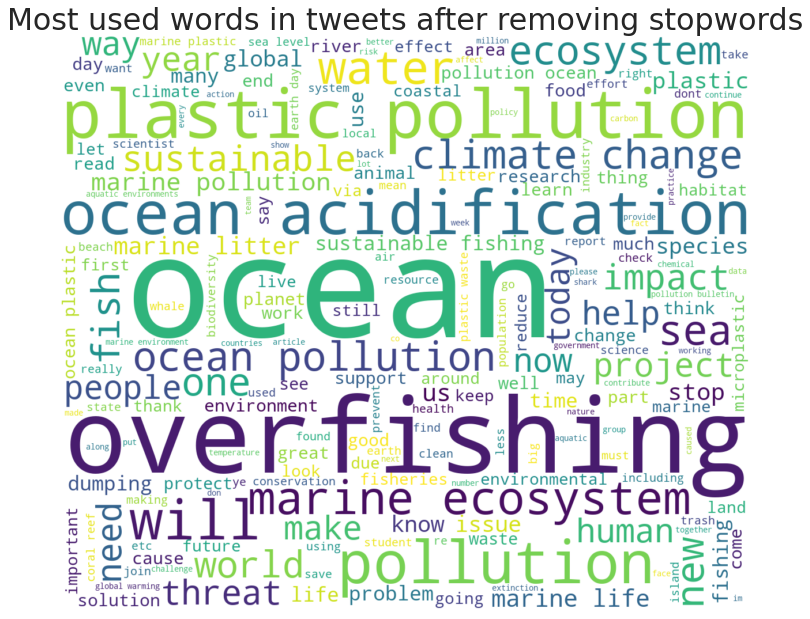

In [83]:
#wordcloud for tweets after removinng stopwords
wordcloud_generator(df_new['text'], title = "Most used words in tweets after removing stopwords")

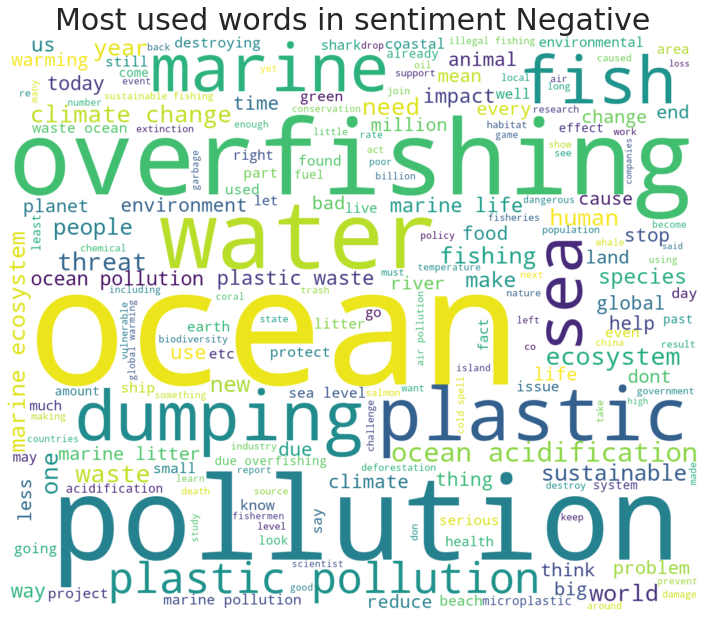

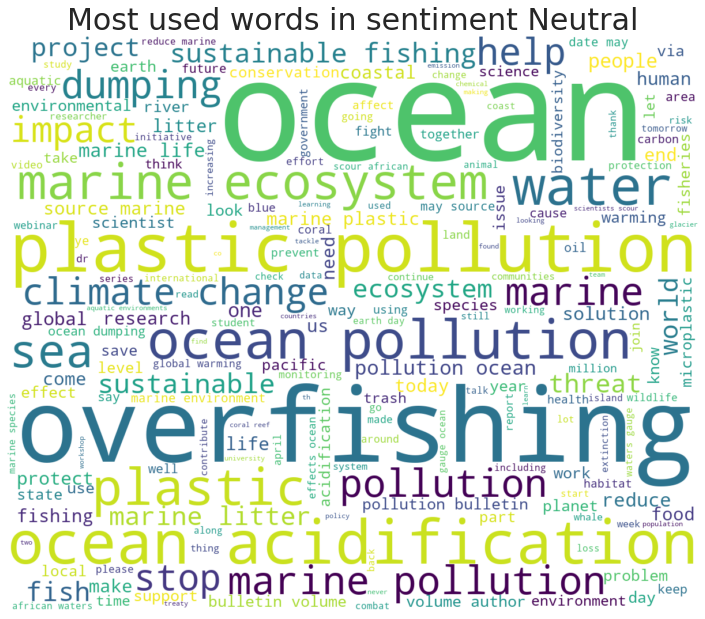

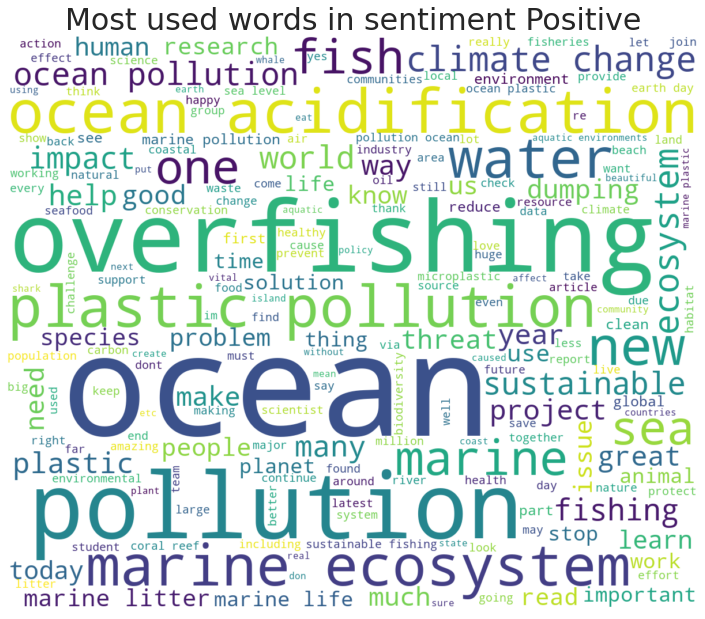

In [84]:
#posTw = df_new['text'].loc[df_new['sentiment'] == 'Positive']
#wordcloud_generator(posTw, title = "Most used words in Positive Sentiment")

#create wordcloud for each sentiment in tweets after removing stopwords
sentiment = np.unique(df_new['sentiment'])
for c in sentiment:
  senTw = df_new[df_new['sentiment'] == c]
  wordcloud_generator(senTw['remstopwords_text'], title = "Most used words in sentiment " + str(c))

#Save dataframe into csv file

In [85]:
filename = 'EDAtweets.csv'
df_new.to_csv(filename, encoding='utf-8-sig')